<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными" data-toc-modified-id="Откроем-файл-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файл с данными</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ВЫВОД</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

# Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', 100)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


###  Откроем файл с данными

In [2]:
def my_func(x):
    print('------------- Исходный датафрейм -------------')
    display(x.head())
    display(x.tail())
    print('')
    print('')
    print('------------- Общая информация о датафрейме -------------')
    print('')
    print('')
    display(x.info())
    print('------------- Количество пустых значений в датафрейме -------------')
    print('')
    print('')
    display(x.isna().sum())
    print('------------- Количество явных дубликатов в датафрейме -------------')
    display(x.duplicated().sum())
    print('')
    print('')
    print('------------- Описательная статистика -------------')
    display(x.describe())
    print('')
    print('')
    print('------------- Размер датасета -------------')
    display(x.shape)
    
df = pd.read_csv(r"C:\Users\lebed\Downloads\insurance.csv")


my_func(df)


------------- Исходный датафрейм -------------


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,"49,600.00",1,0
1,0,46.00,"38,000.00",1,1
2,0,29.00,"21,000.00",0,0
3,0,21.00,"41,700.00",2,0
4,1,28.00,"26,100.00",0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.00,"35,700.00",2,0
4996,0,34.00,"52,400.00",1,0
4997,0,20.00,"33,900.00",2,0
4998,1,22.00,"32,700.00",3,0
4999,1,28.00,"40,600.00",1,0




------------- Общая информация о датафрейме -------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

------------- Количество пустых значений в датафрейме -------------




Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

------------- Количество явных дубликатов в датафрейме -------------


153



------------- Описательная статистика -------------


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,0.50,30.95,"39,916.36",1.19,0.15
std,0.50,8.44,"9,900.08",1.09,0.46
min,0.00,18.00,"5,300.00",0.00,0.00
25%,0.00,24.00,"33,300.00",0.00,0.00
50%,0.00,30.00,"40,200.00",1.00,0.00
75%,1.00,37.00,"46,600.00",2.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00




------------- Размер датасета -------------


(5000, 5)

изменим тип данных для столбца возраст и зарплата аналогично другим

In [3]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


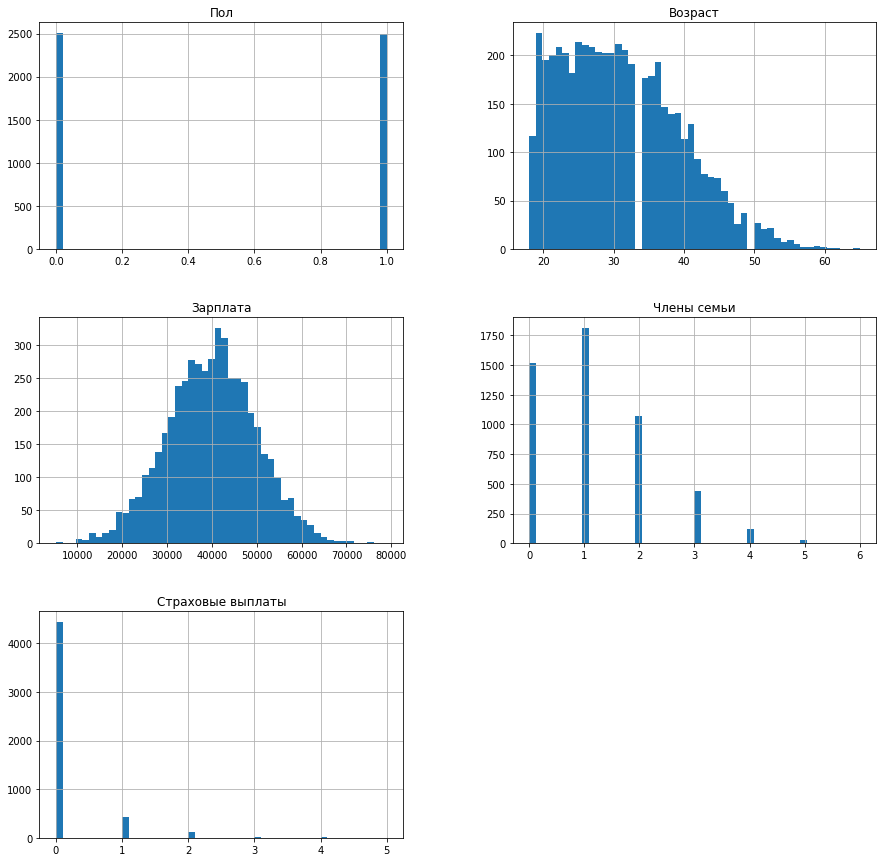

In [5]:
df.hist(figsize=(15,15), bins = 50)
plt.show()

# Вывод:

Из представленных данных видно, что :

1) в данном сетет представлено 5000 записей, пропусков не обнаружено, выявлено 153 дубликата, формат данных представлен в соответсвии с информацией, но было принято решение привести формат к одному типу данных во всех столбцах

2) в данных не обнаружено каких-либо критических отклонений, которые нужно было устранить/изменить. в данных представлены два пола( М и Ж), возраст от 18 до 65 лет, ЗП от 5300 до 79000,члены семьи от 0 до 6, и кол-во выплат от 0 до 5

3) в столбце пол мужчины и женьщины представлены практически в равных долях, в столбце возраcт- большая часть значений приходится на возраст от 23 до 34 лет, столбец зарплат - среднее значение находится на 40 тыс., в столбце члены семьи наибольшее значение относится к 1, на втором месте 0 (наверное, имеется ввиду семейное положение холост), страховые выплаты более 80 % приходится на 0, т.е. за последнении 5 лет, выплаты получали не более 20 % семей 





## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**

"b". не изменится.  Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Обоснование:**  

умножение признаков на обратимую матрицу не влияет на линейную зависимость друг от друга => при обучении линейной регрессии после умножения на обратимую матрицу, предсказания остнутся таким же.

1) из условия :
$$ 𝑎=𝑋𝑤 $$

$$ w = (X^T X)^{-1} X^T y $$
2) таким образом, при умножении признаков X на обратимую матрицу P = x1 
    $$ a1=x1w1 $$ => $$ a1=XPw1 $$
    
   $$ w1=((XP)^T (XP))^{-1} (XP)^T y $$
3) расскрыв скобки нового веса получим:

$w_1=(P^T X^T XP)^{-1} P^T X^T y =(P^T(X^TX)P)^{-1} P^T X^T y =P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y$

далее, преобразовав 

$$ w1= (p^{-1})(X^T X)^{-1} X^T y $$

$$ w1= (p^{-1}) w $$
    
4) как итог, подставив в формулу a1 выражение w1 через w, получим a1 = XW = a

## Алгоритм преобразования

**Алгоритм**

Алгоритм  преобразования составим на основании обоснования теории выше:

- создаем рандомную матрицу(обратимую) размера n*n
- умножаем исходную матрицу на обратимую
- производим обучение лин. рег. на новых данных



**Обоснование**

    т.к.преобразование данных с помощью умножения на обратимую матрицу сохраняет качество линейной регрессии,а также позволяет зашифровать данные  пользователей
    

## Проверка алгоритма

# выделим целевой признак( страховые выплаты)

In [6]:
t=df['Страховые выплаты']
f=df.drop('Страховые выплаты', axis=1)

# Создадим рандомную матрицу

In [7]:
n = f.shape[1] 
p = np.random.rand(n, n)
while np.linalg.det(p) == 0:  
    p = np.random.rand(n, n)

In [8]:
new_f=f @ p

модель линейной регрессии по дефолту

In [9]:
default_model = LinearRegression()
default_model.fit(f, t)
predictions_default= default_model.predict(f)
r2_default_model = r2_score(t, predictions_default)

зашифрованная модель

In [10]:
encrypted_model = LinearRegression()
encrypted_model.fit(new_f, t)
predictions_encrypted= encrypted_model.predict(new_f)
r2_encrypted = r2_score(t, predictions_encrypted)

проверка метри R2 для двух моделей

In [11]:
print("R2 на исходных данных:", r2_default_model)
print("R2 на преобразованных данных:", r2_encrypted)

R2 на исходных данных: 0.42494550308169177
R2 на преобразованных данных: 0.4249455030816841


как видно, показатель метрики практически равны ( до 13 знака после запятой)

## ВЫВОД 

1) загрузили и изучили данные. Преодобработка данных не потребовалась

2) 
    - в данном сетет представлено 5000 записей, пропусков не обнаружено, выявлено 153 дубликата, формат данных представлен в соответсвии с информацией, но было принято решение привести формат к одному типу данных во всех столбцах

    - в данных не обнаружено каких-либо критических отклонений, которые нужно было устранить/изменить. в данных представлены два пола( М и Ж), возраст от 18 до 65 лет, ЗП от 5300 до 79000,члены семьи от 0 до 6, и кол-во выплат от 0 до 5

    - в столбце пол мужчины и женьщины представлены практически в равных долях, в столбце возрат- большая часть значений приходится на возраст от 23 до 34 лет, столбец зарплат - среднее значение находится на 40 тыс., в столбце члены семьи наибольшее значение относится к 1, на втором месте 0 (наверное, имеется ввиду семейное положение холост), страховые выплаты более 80 % приходится на 0, т.е. за последнении 5 лет, выплаты получали не более 20 % семей

    
3) ответили на поставленную задачу и доказали, что умножение признаков на обратимую матрицу не влияет на линейную зависимость друг от друга => при обучении линейной регрессии после умножения на обратимую матрицу, предсказания остнутся таким же.

4) опираясь на доказательство составили алгоритм действий

5) провелики проверка алгоритма и получили практически равные метрики R2. 